In [3]:
import neuroshare as ns
from mealib.preprocessing import Sync
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from scipy.signal import butter, lfilter

fs = 20000.0 # sample
cutoff = 200 # cutoff
B, A = butter(4, cutoff / (fs / 2), btype='low') # 4st order Butterworth low-pass


In [ ]:
exp = '../data/raw_data/uerg/uerg_analog.mcd'

mcd_file = ns.File(exp)

In [30]:
start_point = 154360
windows = 857923 - 154360
nstep = 100
npoint = int(np.ceil(float(windows)/nstep))
npoint

7036

In [58]:
uerg = np.zeros((252,npoint))
for kidx in range(252):
    data, time, dur = mcd_file.entities[kidx].get_data(start_point,windows)
    filtered_signal = lfilter(B, A, data, axis=0)
    uerg[kidx] = filtered_signal[::nstep]

time = time[::nstep] - time[0]

uerg /= np.amax(uerg)

In [63]:
stim = np.loadtxt('../data/stim/fullfiledchirp.txt')/126.-1
stim_time = np.linspace(0,2100/59.968,2101,endpoint=True)
stim_time.shape

(2101,)

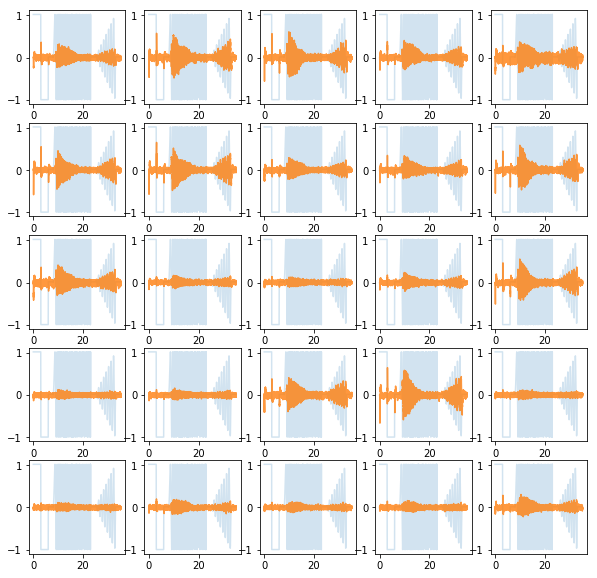

In [74]:
plt.figure(figsize=(10,10))
for kplot, kidx in enumerate(range(75,100)):
    plt.subplot(5,5,kplot+1)
    #plt.plot(time,data,alpha=0.4, c='b')
    #plt.subplot(2,1,2)
    plt.plot(stim_time,stim,alpha=0.2)
    plt.plot(time,uerg[kidx],alpha=0.8)
    

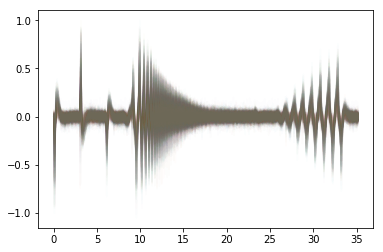

In [79]:
plt.figure()
for kidx in range(252):
    plt.plot(time,uerg[kidx],alpha=0.01)